# Tests Détection de Langages

In [1]:
import datetime
import copy as c
import random
import collections
import time

import pandas as pd
import matplotlib.pyplot as plt
#!pip install spacy
#!pip install spacy-langdetect
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector
#!python -m spacy download en_core_web_lg 

In [2]:
url="https://www.ecb.europa.eu/press/key/shared/data/all_ECB_speeches.csv?5f1650f87c081c670b20cc03e741c558"

#le fichier de janvier contient 4 discours de plus que celui de décembre

url_december="https://www.ecb.europa.eu/press/key/shared/data/all_ECB_speeches.csv?848ea64ce6d77827b5e8e18790878b64"

df=pd.read_csv(url,sep = "|",encoding='utf-8')

# Une connexion lente peut obliger à télécharger le fichier en local
url_local=r"C:\Users\Antoine\Downloads\all_ECB_speeches.csv"
#df=pd.read_csv(url_local,sep = "|",encoding='utf-8')

# fichier mis à jour tous les mois, dernière version : 1er janvier 2022 (49,1 Mo)
# à récupérer à l'adresse : https://www.ecb.europa.eu/press/key/html/downloads.en.html
# plus de 2500 discours de responsables de la BCE entre 1997 et 2021

In [3]:
df

,date,speakers,title,subtitle,contents
0,2021-12-10,Fabio Panetta,The present and future of money in the digital...,"Lecture by Fabio Panetta, Member of the Execut...",SPEECH The present and future of money in ...
1,2021-12-08,Isabel Schnabel,Monetary policy and financial stability,"Speech by Isabel Schnabel, Member of the Execu...",SPEECH Monetary policy and financial stabi...
2,2021-12-08,Luis de Guindos,Macroprudential policy for non-bank financial ...,"Speech by Luis de Guindos, Vice-President of t...",SPEECH Macroprudential policy for non-bank...
3,2021-12-08,Christine Lagarde,Macroprudential policy in Europe – the future ...,"Welcome remarks by Christine Lagarde, Presiden...",SPEECH Macroprudential policy in Europe – ...
4,2021-11-29,Christine Lagarde,Dialogue in a changing world,"Lectio Magistralis by Christine Lagarde, Presi...",SPEECH Dialogue in a changing world Lect...
...,...,...,...,...,...
2548,1997-05-13,Alexandre Lamfalussy,The European Central Bank: independent and acc...,Keynote speech delivered by Alexandre Lamfalus...,The European Central Bank: independent and a...
2549,1997-04-30,Alexandre Lamfalussy,The operation of monetary policy in stage thre...,"Address by Alexandre Lamfalussy, President of ...",The operation of monetary policy in stage th...
2550,1997-04-22,Alexandre Lamfalussy,Convergence and the role of the European Centr...,"Remarks by Alexandre Lamfalussy, President of ...",Convergence and the role of the European Cen...
2551,1997-03-10,Alexandre Lamfalussy,Securing the benefits of EMU,"Address by Alexandre Lamfalussy, President of ...",Securing the benefits of EMU Address by Al...


In [4]:
print(df.isna().sum())
# on affiche un dataframe avec toutes les lignes contenant au moins un NaN
df[df.isna().any(axis=1)] 

date         0
speakers     2
title        0
subtitle     1
contents    39
dtype: int64


,date,speakers,title,subtitle,contents
5,2021-11-29,Isabel Schnabel,Inflation im Euroraum: Ursachen und Ausblick,"Presentation by Isabel Schnabel, Member of the...",NaN
8,2021-11-25,Isabel Schnabel,Inflation im Euroraum: Ursachen und Ausblick,"Presentation by Isabel Schnabel, Member of the...",NaN
9,2021-11-24,Isabel Schnabel,A new strategy for a changing world,"Presentation by Isabel Schnabel, Member of the...",NaN
18,2021-11-11,Philip R. Lane,Expectations surveys: a tool for research and ...,"Introductory remarks by Philip R. Lane, Member...",NaN
21,2021-11-09,Fabio Panetta,Digital currencies around the world – what are...,"Presentation by Fabio Panetta, Member of the E...",NaN
35,2021-10-07,Philip R. Lane,Data analysis and monetary policy during the p...,"Presentation by Philip R. Lane, Member of the ...",NaN
45,2021-09-15,Philip R. Lane,The ECB's monetary policy strategy review - IM...,"Presentation by Philip R. Lane, Member of the ...",NaN
48,2021-08-26,Isabel Schnabel,Die neue geldpolitische Strategie der Europäis...,"Vortrag von Isabel Schnabel, Mitglied des Dire...",NaN
56,2021-06-24,Isabel Schnabel,The ECB’s policy response to the COVID-19 pand...,"Guest lecture by Isabel Schnabel, Member of th...",NaN
57,2021-06-22,NaN,Die Geldpolitik der EZB in der Corona-Krise,"Vortrag von Isabel Schnabel, Mitglied des Dire...",NaN


On remarque que pour tous les discours, on a seulement le titre et le speaker mais le contenu est NaN. Il faut donc mettre de côté tous ces discours sans contenu. Ce cas se présente seulement pour 39 discours (soit 1,5% de la base de données).

In [5]:
df=df.dropna(axis='index',how='any')
df=df.reset_index(drop=True)

In [6]:
df

,date,speakers,title,subtitle,contents
0,2021-12-10,Fabio Panetta,The present and future of money in the digital...,"Lecture by Fabio Panetta, Member of the Execut...",SPEECH The present and future of money in ...
1,2021-12-08,Isabel Schnabel,Monetary policy and financial stability,"Speech by Isabel Schnabel, Member of the Execu...",SPEECH Monetary policy and financial stabi...
2,2021-12-08,Luis de Guindos,Macroprudential policy for non-bank financial ...,"Speech by Luis de Guindos, Vice-President of t...",SPEECH Macroprudential policy for non-bank...
3,2021-12-08,Christine Lagarde,Macroprudential policy in Europe – the future ...,"Welcome remarks by Christine Lagarde, Presiden...",SPEECH Macroprudential policy in Europe – ...
4,2021-11-29,Christine Lagarde,Dialogue in a changing world,"Lectio Magistralis by Christine Lagarde, Presi...",SPEECH Dialogue in a changing world Lect...
...,...,...,...,...,...
2509,1997-05-13,Alexandre Lamfalussy,The European Central Bank: independent and acc...,Keynote speech delivered by Alexandre Lamfalus...,The European Central Bank: independent and a...
2510,1997-04-30,Alexandre Lamfalussy,The operation of monetary policy in stage thre...,"Address by Alexandre Lamfalussy, President of ...",The operation of monetary policy in stage th...
2511,1997-04-22,Alexandre Lamfalussy,Convergence and the role of the European Centr...,"Remarks by Alexandre Lamfalussy, President of ...",Convergence and the role of the European Cen...
2512,1997-03-10,Alexandre Lamfalussy,Securing the benefits of EMU,"Address by Alexandre Lamfalussy, President of ...",Securing the benefits of EMU Address by Al...


#### En explorant le dataset, on se rend compte que certains contenus de discours sont vides (empty string mais pas NaN).
#### Il faut donc retirer ces lignes du dataframe.

In [7]:
L=[]
for i in range(len(df)):
    if not bool(df["contents"][i].strip()): #si le contenu du discours est vide
        L.append(i)
L # ne concerne qu'une ligne

[2009]

In [8]:
df=df.drop(L).reset_index(drop=True)
df

,date,speakers,title,subtitle,contents
0,2021-11-29,Christine Lagarde,Dialogue in a changing world,"Lectio Magistralis by Christine Lagarde, Presi...",SPEECH Dialogue in a changing world Lect...
1,2021-11-26,Christine Lagarde,Change and continuity in law,"Keynote speech by Christine Lagarde, President...",SPEECH Change and continuity in law Keyn...
2,2021-11-25,Frank Elderson,When you need change to preserve continuity: c...,"Speech by Frank Elderson, Member of the Execut...",SPEECH When you need change to preserve co...
3,2021-11-24,Fabio Panetta,Patient monetary policy amid a rocky recovery,"Speech by Fabio Panetta, Member of the Executi...",SPEECH Patient monetary policy amid a rock...
4,2021-11-22,Luis de Guindos,Ralph Koijen’s contribution to research on the...,"Remarks by Luis de Guindos, Vice-President of ...",SPEECH Ralph Koijen’s contribution to rese...
...,...,...,...,...,...
2504,1997-05-13,Alexandre Lamfalussy,The European Central Bank: independent and acc...,Keynote speech delivered by Alexandre Lamfalus...,The European Central Bank: independent and a...
2505,1997-04-30,Alexandre Lamfalussy,The operation of monetary policy in stage thre...,"Address by Alexandre Lamfalussy, President of ...",The operation of monetary policy in stage th...
2506,1997-04-22,Alexandre Lamfalussy,Convergence and the role of the European Centr...,"Remarks by Alexandre Lamfalussy, President of ...",Convergence and the role of the European Cen...
2507,1997-03-10,Alexandre Lamfalussy,Securing the benefits of EMU,"Address by Alexandre Lamfalussy, President of ...",Securing the benefits of EMU Address by Al...


### On se rend compte que certains discours ne sont pas en anglais.
#### Il faut donc les retirer pour notre analyse.
#### C'est ici qu'apparaît le problème de la détection de langue.

Avant d'utiliser des méthodes déjà existantes de détection de langue, on observe la longueur des "échantillons" de texte à analyser (titres et contenus).

Nombre moyen de caractères dans les discours :  19632.969310482265
Minimum de caractères dans les discours :  249
Maximum de caractères dans les discours :  113165


<AxesSubplot:title={'center':'Nombre de caractères dans les discours'}>

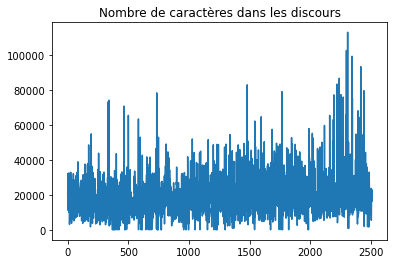

In [9]:
# Test sur la longueur du contenu des discours
print("Nombre moyen de caractères dans les discours : ",df.contents.str.len().mean())
print("Minimum de caractères dans les discours : ", df.contents.str.len().min())
print("Maximum de caractères dans les discours : ", df.contents.str.len().max())
df.contents.str.len().plot(title="Nombre de caractères dans les discours")

Nombre moyen de caractères dans les titres :  60.748903945795135
Minimum de caractères dans les titres :  5
Maximum de caractères dans les titres :  231


<AxesSubplot:title={'center':'Nombre de caractères dans les titres'}>

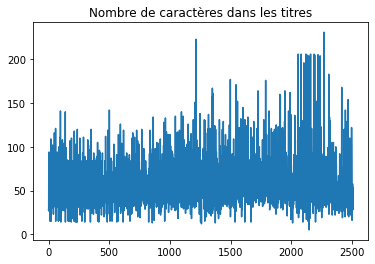

In [10]:
#Test sur la longueur des titres
print("Nombre moyen de caractères dans les titres : ",df.title.str.len().mean())
print("Minimum de caractères dans les titres : ", df.title.str.len().min())
print("Maximum de caractères dans les titres : ", df.title.str.len().max())
df.title.str.len().plot(title="Nombre de caractères dans les titres")

## Modèle de détection (spacy)

In [11]:

def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load('en_core_web_lg')
# la ligne suivante doit être mise en commentaire si ce n'est pas la première fois qu'on exécute le notebook
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)
text = 'This is an english text.'
doc = nlp(text)
print(doc._.language)


{'language': 'en', 'score': 0.9999964506659416}


In [12]:
doc._.language["language"]

'en'

### Avec les titres 

In [13]:
start = time.time()
EN=0
OTHERS=0
L=[]
I0=[]
s=''
n=len(df)
#random.sample(range(n),500)
for i in range(n):
    #print(i)
    s=df["title"][i]
    doc = nlp(s)
    if doc._.language["language"]=='en':
        EN+=1
    else:
        OTHERS+=1
        L.append(s)
        I0.append(i)
print("Proportion de discours en anglais : ", EN/n)
end = time.time()
print("Temps pris par cette méthode :", end - start)

"""
Proportion de discours en anglais :  0.8999601434834595
Temps pris par cette méthode : 25.839558839797974
"""

Proportion de discours en anglais :  0.9011558389796732
Temps pris par cette méthode : 27.53655481338501


'\nProportion de discours en anglais :  0.8999601434834595\nTemps pris par cette méthode : 25.839558839797974\n'

### Avec les 1000 premiers caractères du discours

In [14]:
start = time.time()
EN=0
OTHERS=0
L=[]
I1=[]
s=''
n=len(df)
#random.sample(range(n),500)
for i in range(n):
    #print(i)
    s=df["contents"][i][:1000]
    doc = nlp(s)
    if doc._.language["language"]=='en':
        EN+=1
    else:
        OTHERS+=1
        L.append(s)
        I1.append(i)
print("Proportion de discours en anglais : ", EN/n)
end = time.time()
print("Temps pris par cette méthode :", end - start)

"""Proportion de discours en anglais :  0.9182941410920685
Temps pris par cette méthode : 80.60761404037476"""

Proportion de discours en anglais :  0.917895575926664
Temps pris par cette méthode : 82.31854248046875


'Proportion de discours en anglais :  0.9182941410920685\nTemps pris par cette méthode : 80.60761404037476'

### Avec le début du discours privé de la répétition du titre

In [15]:
start = time.time()
EN=0
OTHERS=0
L=[]
I2=[]
s=''
n=len(df)
#random.sample(range(n),500)
for i in range(n):
    #print(i)
    s=df["contents"][i][200:2000]
    doc = nlp(s)
    if doc._.language["language"]=='en':
        EN+=1
    else:
        OTHERS+=1
        L.append(s)
        I2.append(i)
print("Proportion de discours en anglais : ", EN/n)
end = time.time()
print("Temps pris par cette méthode :", end - start)

"""Proportion de discours en anglais :  0.9286568353925867
Temps pris par cette méthode : 129.33490419387817"""

Proportion de discours en anglais :  0.9298525308888003
Temps pris par cette méthode : 134.1792392730713


'Proportion de discours en anglais :  0.9286568353925867\nTemps pris par cette méthode : 129.33490419387817'

### Avec les 2000 premiers caractères

In [16]:
start = time.time()
EN=0
OTHERS=0
L=[]
I3=[]
s=''
n=len(df)
#random.sample(range(n),500)
for i in range(n):
    #print(i)
    s=df["contents"][i][:2000]
    doc = nlp(s)
    if doc._.language["language"]=='en':
        EN+=1
    else:
        OTHERS+=1
        L.append(s)
        I3.append(i)
print("Proportion de discours en anglais : ", EN/n)
end = time.time()
print("Temps pris par cette méthode :", end - start)

"""Proportion de discours en anglais :  0.9290554005579912
Temps pris par cette méthode : 143.3227822780609"""

Proportion de discours en anglais :  0.9290554005579912
Temps pris par cette méthode : 143.97742128372192


'Proportion de discours en anglais :  0.9290554005579912\nTemps pris par cette méthode : 143.3227822780609'

## Modèle de détection langdetect

In [17]:
#!pip install langdetect
from langdetect import detect

In [18]:
# Extrait de la documentation https://pypi.org/project/langdetect/#description
# langdetect Language detection algorithm is non-deterministic,
# which means that if you try to run it on a text which is either too short or too ambiguous,
# you might get different results everytime you run it.
# To enforce consistent results, call following code before the first language detection:

from langdetect import DetectorFactory
DetectorFactory.seed = 0

### Avec les titres 

In [19]:
start = time.time()
EN=0
OTHERS=0
L=[]
J0=[]
s=''
n=len(df)
#random.sample(range(n),500)
for i in range(n):
    #print(i)
    s=detect(df["title"][i])
    if s=='en':
        EN+=1
    else:
        OTHERS+=1
        L.append(s)
        J0.append(i)
print("Proportion de discours en anglais : ", EN/n)
end = time.time()
print(end - start) 

# Quelques centaines de discours dans d'autres langues (français, allemand, espagnol, italien, néerlandais,...)
# Cependant on constate qu'il reste des discours en français et en allemand non mis de coté
# Certains discours en anglais sont mis de côté de manière injustifiée

"""Proportion de discours en anglais :  0.9035472299721005
Temps pris par cette méthode : 12.753894805908203"""

Proportion de discours en anglais :  0.8983658828218414
13.746001482009888


'Proportion de discours en anglais :  0.9035472299721005\nTemps pris par cette méthode : 12.753894805908203'

### Avec les 1000 premiers caractères

In [20]:
start = time.time()
EN_1=0
OTHERS_1=0
M=[]
J1=[]
s=''
n=len(df)
#random.sample(range(n),500)
for i in range(n):
    #print(i)
    s=detect(df["contents"][i][:1000])
    if s=='en':
        EN_1+=1
    else:
        OTHERS_1+=1
        M.append(s)
        J1.append(i)
print("Proportion de discours en anglais : ", EN_1/n)
end = time.time()
print("Temps pris par cette méthode :", end - start) 

"""
Proportion de discours en anglais :  0.917098445595855
Temps pris par cette méthode : 13.944712400436401
"""

Proportion de discours en anglais :  0.9182941410920685
Temps pris par cette méthode : 16.02874183654785


'\nProportion de discours en anglais :  0.917098445595855\nTemps pris par cette méthode : 13.944712400436401\n'

### Avec les 2000 premiers caractères mais sans les 200 premiers

In [21]:
start = time.time()
EN_1=0
OTHERS_1=0
M=[]
J2=[]
s=''
n=len(df)
#random.sample(range(n),500)
for i in range(n):
    #print(i)
    s=detect(df["contents"][i][200:2000])
    if s=='en':
        EN_1+=1
    else:
        OTHERS_1+=1
        M.append(s)
        J2.append(i)
print("Proportion de discours en anglais : ", EN_1/n)
end = time.time()
print("Temps pris par cette méthode :", end - start) 

"""
Proportion de discours en anglais :  0.9278597050617776
Temps pris par cette méthode : 20.057332754135132
"""

Proportion de discours en anglais :  0.9286568353925867
Temps pris par cette méthode : 21.024661779403687


'\nProportion de discours en anglais :  0.9278597050617776\nTemps pris par cette méthode : 20.057332754135132\n'

### Avec les 2000 premiers caractères

In [22]:
start = time.time()
EN_1=0
OTHERS_1=0
M=[]
J3=[]
s=''
n=len(df)
#random.sample(range(n),500)
for i in range(n):
    #print(i)
    s=detect(df["contents"][i][:2000])
    if s=='en':
        EN_1+=1
    else:
        OTHERS_1+=1
        M.append(s)
        J3.append(i)
print("Proportion de discours en anglais : ", EN_1/n)
end = time.time()
print("Temps pris par cette méthode :", end - start) 

"""
Proportion de discours en anglais :  0.9294539657233958
Temps pris par cette méthode : 19.53878378868103
"""

Proportion de discours en anglais :  0.9286568353925867
Temps pris par cette méthode : 22.256977319717407


'\nProportion de discours en anglais :  0.9294539657233958\nTemps pris par cette méthode : 19.53878378868103\n'

### Avec les 5000 premiers caractères

In [23]:
start = time.time()
EN_1=0
OTHERS_1=0
M=[]
J4=[]
s=''
n=len(df)
#random.sample(range(n),500)
for i in range(n):
    #print(i)
    s=detect(df["contents"][i][:5000])
    if s=='en':
        EN_1+=1
    else:
        OTHERS_1+=1
        M.append(s)
        J4.append(i)
print("Proportion de discours en anglais : ", EN_1/n)
end = time.time()
print("Temps pris par cette méthode :", end - start) 

"""
Proportion de discours en anglais :  0.936229573535273
Temps pris par cette méthode : 37.724875688552856
"""

Proportion de discours en anglais :  0.9366281387006775
Temps pris par cette méthode : 45.78627157211304


'\nProportion de discours en anglais :  0.936229573535273\nTemps pris par cette méthode : 37.724875688552856\n'

## Comparaison des méthodes

In [24]:
liste=[I0,I1,I2,I3,J0,J1,J2,J3,J4]
for L in liste:
    print(len(L))

248
206
176
178
255
205
179
179
159


In [25]:
#Comparaison des deux méthodes analysant uniquement les titres 
print([value for value in J0 if value not in I0]) #vérification à la main : titre "trompeur" mais contenu en anglais (sauf 1)
print([value for value in I0 if value not in J0]) #vérification à la main : contenu en anglais
# Les deux méthodes de détection via les titres semblent semblables mais assez peu efficaces 

[192, 231, 475, 546, 573, 697, 901, 1343, 1644, 1750, 1822, 1832]
[361, 436, 1333, 1720, 1945]


On peut observer un problème avec les discours de Jean-Claude Trichet, président de l'ECB de 2003 à 2011, qui commence (et parfois termine) toutes ses interventions en français, parfois en allemand, alors que tous les discours sont en anglais.

In [26]:
# Comparaison des résultats des méthodes analysant les 2000 premiers caractères privés des titres
print([value for value in J2 if value not in I2])
print([value for value in I2 if value not in J2])
# Tous ce discours contiennent des phrases en allemand et/ou en français.

[1179, 1473, 1482]
[]


In [27]:
#En prenant en compte ou non les débuts de discours
print([value for value in I2 if value not in I3]) # toujours le problème avec les discours de Jean Claude Trichet 
print([value for value in I3 if value not in I2]) #discours très court en allemand 1758


[1902, 1977]
[1179, 1473, 1535, 1758]


In [28]:
print([value for value in J2 if value not in J3]) 
print([value for value in J3 if value not in J2]) 

[1179, 1662, 1902]
[1137, 1535, 1758]


In [29]:
print([value for value in I3 if value not in J3]) 
print([value for value in J3 if value not in I3]) 

[1179, 1662]
[1137, 1482, 1977]


In [30]:
for i in [value for value in I3 if value not in J3]:
    print(df["speakers"][i]," - ",df["title"][i])

Jean-Claude Trichet  -  The ECB's response to the crisis
Jean-Claude Trichet  -  Hearing at the Economic and Monetary Affairs Committee of the European Parliament


In [31]:
for i in [value for value in J3 if value not in J4]:
    print(df["speakers"][i]," - ",df["title"][i])

Jean-Claude Trichet  -  Hearing at the Committee on Economic and Monetary Affairs of the European Parliament
Jean-Claude Trichet  -  Hearing at the Committee on Economic and Monetary Affairs of the European Parliament
Jean-Claude Trichet  -  Hearing at the Committee on Economic and Monetary Affairs of the European Parliament
Jean-Claude Trichet  -  Hearing before the plenary of the European Parliament on the occasion of the adoption of the EP resolution on the ECB's 2009 Annual Report
Jean-Claude Trichet  -  Lessons from the financial crisis
Jean-Claude Trichet  -  Hearing before the Economic and Monetary Affairs Committee of the European Parliament
Jean-Claude Trichet  -  Macroeconomic policies, imbalances and the need to avoid going back to the status quo ante
Jean-Claude Trichet  -  Hearing at the Economic and Monetary Affairs Committee of the European Parliament
Jean-Claude Trichet  -  Ehrenplaquette of the city of Frankfurt am Main - awarding ceremony
Jean-Claude Trichet  -  Heari

In [32]:
#Comparaison qui semble la plus intéressante entre les deux méthodes
print([value for value in I3 if value not in J2]) 
print([value for value in J2 if value not in I3]) 

[1535, 1758]
[1482, 1902, 1977]


In [33]:
#df["contents"][1758] #discours très court et en allemand

In [34]:
n=random.sample([value for value in I3 if value not in J3],1)[0]
df["contents"][n]

"  Hearing at the Economic and Monetary Affairs Committee of the European Parliament   Jean-Claude Trichet, President of the ECBBrussels, 9 October 2007 Madame la Présidente, Mesdames et Messieurs les membres de la Commission Economique et Monétaire, je me réjouis d'apparaître devant votre commission aujourd'hui et de poursuivre notre dialogue fructueux. La situation sur les marchés financiers suscite toujours beaucoup d’intérêt. Aujourd’hui, je reviendrai d’abord brièvement sur la situation économique et monétaire, en expliquant les raisons sous-jacentes à nos récentes décisions de taux. Ensuite, je vous fournirai de plus amples informations sur les opérations de politique monétaire de la BCE en réaction aux tensions enregistrées sur le marché monétaire ainsi que sur les initiatives en cours visant à améliorer le cadre relatif à la réglementation, à la surveillance et à la stabilité financières. Schließlich möchte ich ein paar Anmerkungen machen zu den Produktivitätsentwicklungen in E

## Autre modèle de détection de langage ?

In [35]:
#Autre idée : supprimer "à la main" les discours passant à travers les mailles du filet
# utiliser les articles/prépositions les plus courants : le/la/de ou die/fur

 ## Conclusion vis-à-vis des différentes méthodes

Même si les méthodes de détection de langages ave les titres uniquement sont plus rapides, elles entrainent beaucoup d'erreurs (trop de faux positifs). La difficulté de la détection vient en grande partie des discours de Jean Claude Trichet qui comportent plusieurs langues dont l'anglais.

On peut considérer que les discours en plusieurs langues (comme ceux de Jean-Claude Trichet) ne sont pas gênants car ils sont majoritairement en anglais. Il faut juste penser à adapter les stopwords en conséquence.

Par ailleurs, on peut remarquer que les méthodes de langdetect sont beaucoup plus rapides que celles de spacy pour des résultats équivalents (voire identiques). La méthode qui paraît la plus efficace pour cette détection est celle qui utilise langdetect en analysant les 2000 premiers caractères de chaque discours.

## Modification du dataframe

In [36]:
#df["Language"]=pd.Series(dtype=str)
#On pourrait ajouter une colonne "language" pour une analyse ultérieure

In [37]:
# On va donc retirer ces discours des données à analyser
I=J3
df=df.drop(I).reset_index(drop=True)
df

,date,speakers,title,subtitle,contents
0,2021-11-29,Christine Lagarde,Dialogue in a changing world,"Lectio Magistralis by Christine Lagarde, Presi...",SPEECH Dialogue in a changing world Lect...
1,2021-11-26,Christine Lagarde,Change and continuity in law,"Keynote speech by Christine Lagarde, President...",SPEECH Change and continuity in law Keyn...
2,2021-11-25,Frank Elderson,When you need change to preserve continuity: c...,"Speech by Frank Elderson, Member of the Execut...",SPEECH When you need change to preserve co...
3,2021-11-24,Fabio Panetta,Patient monetary policy amid a rocky recovery,"Speech by Fabio Panetta, Member of the Executi...",SPEECH Patient monetary policy amid a rock...
4,2021-11-22,Luis de Guindos,Ralph Koijen’s contribution to research on the...,"Remarks by Luis de Guindos, Vice-President of ...",SPEECH Ralph Koijen’s contribution to rese...
...,...,...,...,...,...
2325,1997-05-13,Alexandre Lamfalussy,The European Central Bank: independent and acc...,Keynote speech delivered by Alexandre Lamfalus...,The European Central Bank: independent and a...
2326,1997-04-30,Alexandre Lamfalussy,The operation of monetary policy in stage thre...,"Address by Alexandre Lamfalussy, President of ...",The operation of monetary policy in stage th...
2327,1997-04-22,Alexandre Lamfalussy,Convergence and the role of the European Centr...,"Remarks by Alexandre Lamfalussy, President of ...",Convergence and the role of the European Cen...
2328,1997-03-10,Alexandre Lamfalussy,Securing the benefits of EMU,"Address by Alexandre Lamfalussy, President of ...",Securing the benefits of EMU Address by Al...


In [38]:
df.sample(5)

,date,speakers,title,subtitle,contents
2244,1999-05-07,Otmar Issing,The euro area economy on its way to the new mi...,Speech by Professor Otmar Issing Member of the...,The euro area economy on its way to the new ...
971,2013-01-31,Vítor Constâncio,Establishment of the Single Supervisory Mechan...,"Speech by Vítor Constâncio, Vice-President of ...",Establishment of the Single Supervisory Mech...
2151,2000-06-28,Otmar Issing,New Technologies in Payments: A Challenge to M...,Professor Otmar IssingLecture to be delivered ...,New Technologies in Payments: A Challenge to...
1234,2010-07-09,Vítor Constâncio,The future of euro governance: how to contain ...,"Speech by Vítor Constâncio, Vice-President of ...",The future of euro governance: how to contai...
1996,2002-10-25,Otmar Issing,Second ECB Central Banking Conference 24-25 O...,Relationship lending in the euro area Prof. Ot...,Second ECB Central Banking Conference 24-25 ...
